# cancellation of policas classification

### Data shape:
   * train: (799999, 12)
   * test: (200000, 12)

### Models:
   * deep learning
   * RandomForest
   * LogisticRegression

Unfortunately, all models gave the same (very low) result.
Of course, in a project with more hours and investment,
higher results can be achieved with manipulations on the data and additional improvements of the models.
The main difficulty is that the computer is not strong enough to run the models,
so each model took a long time to run, and there are models that have not completed it at all ...

In [26]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ExperienceData20180517.csv')
df.head(10)

,PolicyID,Issue Date,Gender,Date of Birth,Product,Smoker,U/W Loading,Married,Sum Insured,Monthly Premium,Industry,Channel,Agent,Cancellation Date
0,1,28/03/2016,1,16/03/1982,YRT,1,0,1,1.378953e+06,113.177544,Hi-Tech,Captive,5801.0,01/01/2099
1,2,01/03/1990,2,30/07/1956,YRT,0,0,0,1.399787e+06,69.522733,Healthcare,Captive,5734.0,22/03/2000
2,3,09/03/1975,2,31/03/1937,NLP,0,0,0,1.437538e+06,1513.763079,Public Service,Captive,5612.0,01/01/2099
3,4,25/05/2004,1,20/08/1962,NLP,0,0,1,1.512038e+06,2181.499989,Finance,Captive,5996.0,01/01/2099
4,5,26/08/1997,1,22/10/1967,NLP,0,1,1,1.384020e+06,1587.328267,Hi-Tech,Captive,5771.0,01/01/2099
5,6,30/01/1978,2,02/03/1941,YRT,1,0,1,9.468682e+05,69.310749,Production,Captive,5685.0,25/02/1983
6,7,20/02/1991,2,18/12/1959,YRT,1,0,1,1.354356e+06,81.509638,Finance,Captive,5676.0,29/06/1991
7,8,02/02/2016,1,13/01/1984,YRT,0,0,1,1.740496e+06,90.041663,Low-Tech,Captive,5783.0,01/01/2099
8,9,08/11/2010,1,04/12/1977,YRT,0,0,0,8.434690e+05,44.886607,Sales,Captive,5790.0,25/02/2011
9,10,14/01/1992,1,04/10/1950,YRT,0,0,1,8.979943e+05,72.557940,Low-Tech,Direct,NaN,11/09/1994


In [3]:
df.isna().sum()

PolicyID                  0
Issue Date                0
Gender                    0
Date of Birth             0
Product                   0
Smoker                    0
U/W Loading               0
Married                   0
Sum Insured               0
Monthly Premium         344
Industry                  0
Channel                   0
Agent                349946
Cancellation Date         0
dtype: int64

In [4]:
df['Agent'] = df['Agent'].fillna(0)
df['Monthly Premium'] = df['Monthly Premium'].fillna(0)
df.dropna(inplace=True)

In [5]:
df.head(10)

,PolicyID,Issue Date,Gender,Date of Birth,Product,Smoker,U/W Loading,Married,Sum Insured,Monthly Premium,Industry,Channel,Agent,Cancellation Date
0,1,28/03/2016,1,16/03/1982,YRT,1,0,1,1.378953e+06,113.177544,Hi-Tech,Captive,5801.0,01/01/2099
1,2,01/03/1990,2,30/07/1956,YRT,0,0,0,1.399787e+06,69.522733,Healthcare,Captive,5734.0,22/03/2000
2,3,09/03/1975,2,31/03/1937,NLP,0,0,0,1.437538e+06,1513.763079,Public Service,Captive,5612.0,01/01/2099
3,4,25/05/2004,1,20/08/1962,NLP,0,0,1,1.512038e+06,2181.499989,Finance,Captive,5996.0,01/01/2099
4,5,26/08/1997,1,22/10/1967,NLP,0,1,1,1.384020e+06,1587.328267,Hi-Tech,Captive,5771.0,01/01/2099
5,6,30/01/1978,2,02/03/1941,YRT,1,0,1,9.468682e+05,69.310749,Production,Captive,5685.0,25/02/1983
6,7,20/02/1991,2,18/12/1959,YRT,1,0,1,1.354356e+06,81.509638,Finance,Captive,5676.0,29/06/1991
7,8,02/02/2016,1,13/01/1984,YRT,0,0,1,1.740496e+06,90.041663,Low-Tech,Captive,5783.0,01/01/2099
8,9,08/11/2010,1,04/12/1977,YRT,0,0,0,8.434690e+05,44.886607,Sales,Captive,5790.0,25/02/2011
9,10,14/01/1992,1,04/10/1950,YRT,0,0,1,8.979943e+05,72.557940,Low-Tech,Direct,0.0,11/09/1994


In [6]:
df.isna().sum()

PolicyID             0
Issue Date           0
Gender               0
Date of Birth        0
Product              0
Smoker               0
U/W Loading          0
Married              0
Sum Insured          0
Monthly Premium      0
Industry             0
Channel              0
Agent                0
Cancellation Date    0
dtype: int64

In [7]:
df= df.drop('PolicyID', axis=1)
df['Gender'] = df['Gender'].replace({1: 0, 2: 1})

In [8]:
str_cols = ['Product', 'Industry', 'Channel']
for col in str_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [9]:
# Convert the date strings to datetime objects
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
# Convert the datetime objects to a numerical representation
df['Issue Date'] = df['Issue Date'].astype('int64')
df['Date of Birth'] = df['Date of Birth'].astype('int64')

C:\Users\PC\AppData\Local\Temp\ipykernel_15588\3555113037.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Issue Date'] = pd.to_datetime(df['Issue Date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_15588\3555113037.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])


In [10]:
df['Cancellation Date'] = df['Cancellation Date'].replace('01/01/2099', 0).replace('[^0]', 1, regex=True)

In [11]:
df = df.sample(frac=1)
df.head(10)

,Issue Date,Gender,Date of Birth,Product,Smoker,U/W Loading,Married,Sum Insured,Monthly Premium,Industry,Channel,Agent,Cancellation Date
624996,1411862400000000000,0,157420800000000000,1,0,0,0,8.881771e+05,66.968556,1,2,0.0,1
725590,1283385600000000000,0,298598400000000000,1,1,0,1,1.668181e+06,124.015319,8,0,5635.0,1
21919,672796800000000000,0,-409795200000000000,1,0,0,0,1.661391e+06,93.065584,5,2,0.0,1
137954,1373241600000000000,0,189907200000000000,0,0,0,1,1.626721e+06,2119.445310,3,0,5606.0,1
522051,1100044800000000000,1,19180800000000000,0,0,0,1,1.223743e+06,1194.183966,10,0,5746.0,1
311841,572227200000000000,1,-396748800000000000,1,0,0,1,9.731564e+05,44.813851,3,0,6079.0,1
392470,1235606400000000000,1,6307200000000000,0,0,0,1,1.156165e+06,1242.085324,5,0,5635.0,1
136239,139795200000000000,0,-690854400000000000,0,1,0,0,1.253508e+06,1800.862179,5,2,0.0,1
710414,110937600000000000,0,-618796800000000000,1,0,0,0,1.634164e+06,110.006446,5,2,0.0,1
185109,170985600000000000,0,-901929600000000000,1,0,0,1,1.408932e+06,78.923666,8,0,5685.0,1


In [12]:
X = df.drop('Cancellation Date', axis=1)
y = df['Cancellation Date']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Xtrain, X_val, ytrain, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("shapes: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

shapes:  (799999, 12) (200000, 12) (799999,) (200000,)


In [14]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=1000)
# Save the model
model.save('model.h5')

Epoch 1/5
800/800 [==============================] - 4s 4ms/step - loss: 0.5181 - accuracy: 0.7548

In [22]:
model_load = load_model('model.h5')
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

6250/6250 [==============================] - 7s 1ms/step - loss: 0.4722 - accuracy: 0.7840

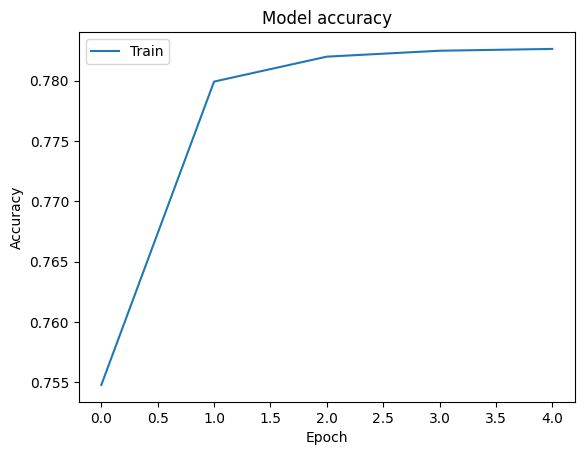

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [29]:
#this function get the model and print the Accuracy and the Confusion Matrix
def printAcc(model):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print("Train accuracy of ",model," model: " ,train_acc)
    print("Test accuracy of ",model," model: ", test_acc)

    # Calculate the confusion matrix for the test set
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # # Plot the confusion matrix using seaborn's heatmap
    # sns.heatmap(cm, annot=True,fmt='.0f', cmap='Blues', xticklabels={0, 1}, yticklabels={0,1})
    # plt.title('Confusion matrix for '+str(model)+' model')
    # plt.xlabel('Predicted label')
    # plt.ylabel('True label')
    # plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier
RANDclf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
printAcc(RANDclf)

Train accuracy of  RandomForestClassifier(max_depth=15, random_state=42)  model:  0.8145360181700227
Test accuracy of  RandomForestClassifier(max_depth=15, random_state=42)  model:  0.788585
[[ 20801  33120]
 [  9163 136916]]


In [30]:
from sklearn.linear_model import LogisticRegression
# Train a machine learning model on the extracted features
lOGclf = LogisticRegression(solver='lbfgs')
printAcc(lOGclf)

Train accuracy of  LogisticRegression()  model:  0.7829459786824734
Test accuracy of  LogisticRegression()  model:  0.78149
[[ 22322  31599]
 [ 12103 133976]]


### conclusion
#### test accuracy: 78% in all of the models.




